In [3]:
import psycopg2
from src.visualization import topics
from collections import defaultdict
from gensim import corpora, models
import os
#import pyLDAvis.gensim
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
corpus = corpora.MmCorpus(os.environ['MODEL_PATH'] + 'articles.mm')
dictionary = corpora.Dictionary.load(os.environ['MODEL_PATH'] + 'articles.dict')
num_topics = 10

In [5]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics) 
# TODO maybe play with iterations and num_passes to get a more stable result

In [6]:
lda.save(os.environ['MODEL_PATH'] + 'articles.lda')

/Users/claasmeiners/.virtualenvs/video_article_retrieval/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


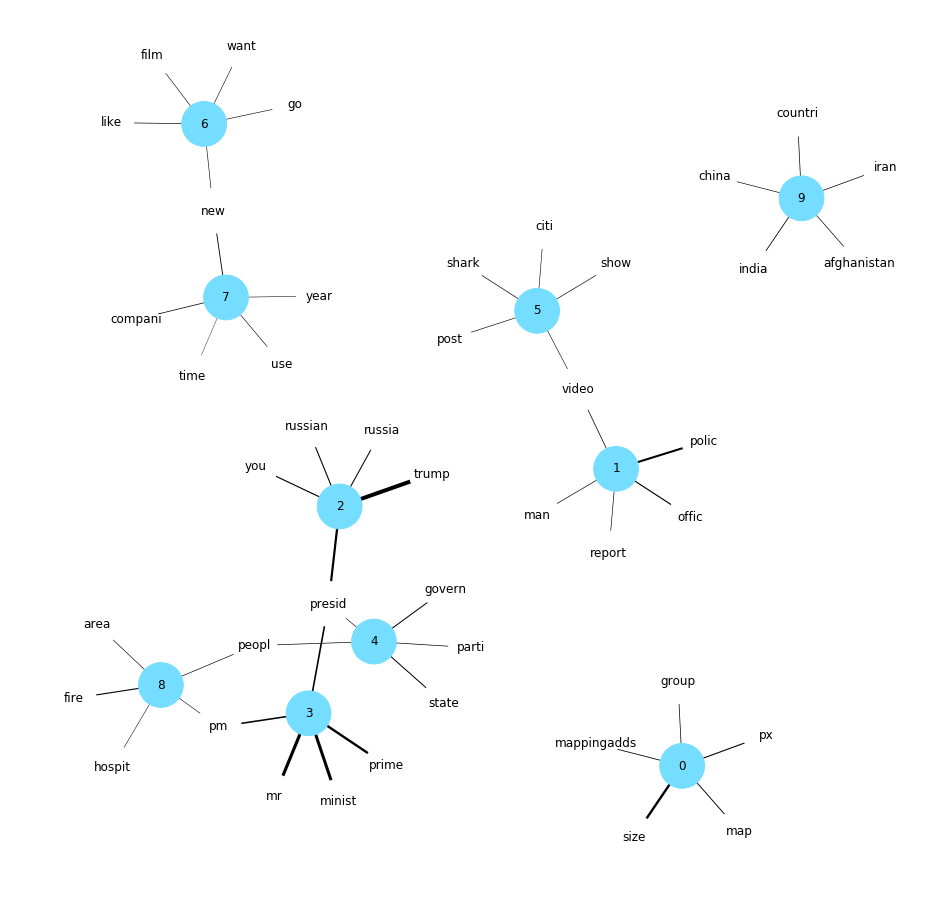

In [7]:
plt.figure(figsize=(16,16))

topics.topic_network_graph(lda, dictionary, num_topics)

plt.axis('off')
plt.savefig('lda_network_graph.pdf', format="pdf",bbox_inches='tight')
plt.show()

In [8]:
topics.print_topics(lda, dictionary, num_topics)


0: size (0.0237), px (0.0109), map (0.0092), mappingadds (0.0080), group (0.0072), 
1: polic (0.0205), offic (0.0114), video (0.0073), man (0.0066), report (0.0064), 
2: trump (0.0400), presid (0.0222), you (0.0113), russian (0.0108), russia (0.0103), 
3: mr (0.0313), minist (0.0301), prime (0.0237), presid (0.0161), pm (0.0156), 
4: govern (0.0100), state (0.0100), parti (0.0068), peopl (0.0067), presid (0.0060), 
5: shark (0.0068), show (0.0064), post (0.0062), citi (0.0057), video (0.0057), 
6: like (0.0067), go (0.0059), film (0.0058), new (0.0058), want (0.0056), 
7: new (0.0086), compani (0.0073), use (0.0060), year (0.0052), time (0.0039), 
8: fire (0.0109), peopl (0.0065), area (0.0064), pm (0.0055), hospit (0.0051), 
9: india (0.0082), iran (0.0070), countri (0.0070), afghanistan (0.0067), china (0.0064), 

In [ ]:
#followers_data =  pyLDAvis.gensim.prepare(lda, corpus, dictionary)
#pyLDAvis.display(followers_data)